In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [3]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

Processing...
Done!


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [13]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

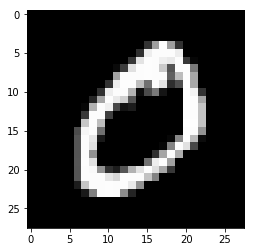

In [14]:
plt.imshow(show_img, cmap='gray')

In [15]:
# Label
train_dataset[1][1]

0

In [17]:
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [18]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)

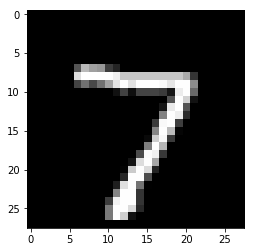

In [19]:
plt.imshow(show_img, cmap='gray')

In [20]:
# Label
test_dataset[0][1]

7

In [21]:
len(train_dataset)

60000

In [22]:
batch_size = 100

In [23]:
n_iters = 3000

In [24]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [26]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [27]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [50]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out

In [52]:
input_dim = 28 * 28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [53]:
metric = nn.CrossEntropyLoss()

In [54]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [55]:
print(model.parameters())
print((list(model.parameters())[0].size()))
print((list(model.parameters())[1].size()))

<generator object Module.parameters at 0x7f586d4bdb48>
torch.Size([10, 784])
torch.Size([10])


In [57]:
iteration = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28), requires_grad=True)
        labels = Variable(labels, requires_grad=False)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = metric(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        iteration += 1
        
        if iteration % 500 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28 * 28))
                
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            print("Iteration: {}. Loss: {}. Acc: {}.".format(iteration, loss.data[0], accuracy))

Iteration: 500. Loss: 0.9427856206893921. Acc: 83.2.
Iteration: 1000. Loss: 0.8115503787994385. Acc: 83.62.
Iteration: 1500. Loss: 0.8708010911941528. Acc: 84.0.
Iteration: 2000. Loss: 0.8225283622741699. Acc: 84.69.
Iteration: 2500. Loss: 0.7800988554954529. Acc: 84.92.
Iteration: 3000. Loss: 0.6915996670722961. Acc: 85.25.
